# Numpy
## Numpy Tutorial
### Linear algebra on n-dimensional arrays
Follow this article：https://numpy.org/doc/stable/user/tutorial-svd.html

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
from scipy import misc
img = misc.face()
type(img)

numpy.ndarray

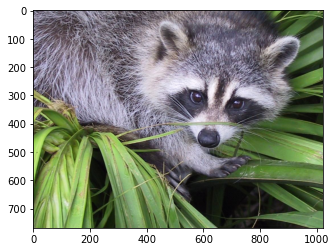

In [4]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [5]:
img.shape

(768, 1024, 3)

In [6]:
img.ndim

3

In [7]:
img[:, :, 0]

array([[121, 138, 153, ..., 119, 131, 139],
       [ 89, 110, 130, ..., 118, 134, 146],
       [ 73,  94, 115, ..., 117, 133, 144],
       ...,
       [ 87,  94, 107, ..., 120, 119, 119],
       [ 85,  95, 112, ..., 121, 120, 120],
       [ 85,  97, 111, ..., 120, 119, 118]], dtype=uint8)

In [8]:
img[:, :, 0].shape

(768, 1024)

In [9]:
img_array = img / 255

In [10]:
img_array.max(), img_array.min()

(1.0, 0.0)

In [11]:
img_array.dtype

dtype('float64')

In [12]:
red_array = img_array[:, :, 0]
green_array = img_array[:, :, 1]
blue_array = img_array[:, :, 2]

In [13]:
from numpy import linalg

(768, 1024)

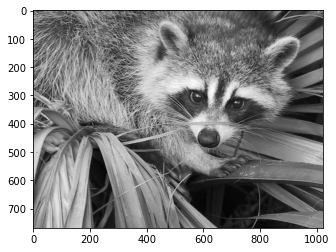

In [14]:
#  @ operator: the matrix multiplication operator for NumPy arrays
img_gray = img_array @ [0.2126, 0.7152, 0.0722]
img_gray.shape
plt.imshow(img_gray, cmap="gray")

In [15]:
U, s, Vt = linalg.svd(img_gray)

In [16]:
U.shape, s.shape, Vt.shape

((768, 768), (768,), (1024, 1024))

In [17]:
import numpy as np
Sigma = np.zeros((768, 1024))
for i in range(768):
     Sigma[i, i] = s[i]

In [18]:
linalg.norm(img_gray - U @ Sigma @ Vt)

1.3245284105876096e-12

In [19]:
np.allclose(img_gray, U @ Sigma @ Vt)

True

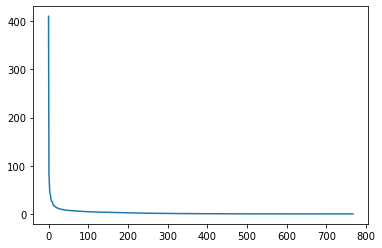

In [20]:
plt.plot(s)

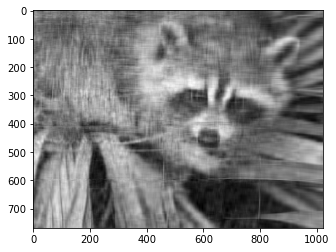

In [21]:
k = 20
approx = U @ Sigma[:, :k] @ Vt[:k, :]
plt.imshow(approx, cmap="gray")

In [22]:
img_array_transposed = np.transpose(img_array, (2, 0, 1))
img_array_transposed.shape

(3, 768, 1024)

In [23]:
U, s, Vt = linalg.svd(img_array_transposed)
U.shape, s.shape, Vt.shape

((3, 768, 768), (3, 768), (3, 1024, 1024))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


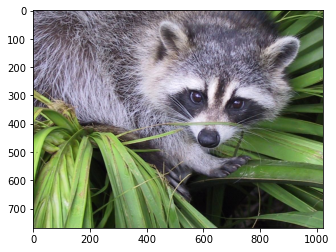

In [24]:
Sigma = np.zeros((3, 768, 1024))
for j in range(3):
    np.fill_diagonal(Sigma[j, :, :], s[j, :])
reconstructed = U @ Sigma @ Vt
plt.imshow(np.transpose(reconstructed, (1, 2, 0)))

In [25]:
approx_img = U @ Sigma[..., :k] @ Vt[..., :k, :]
approx_img.shape

(3, 768, 1024)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


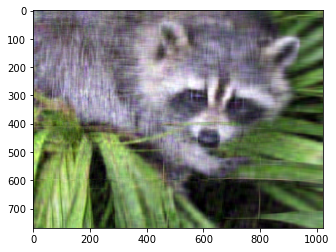

In [26]:
plt.imshow(np.transpose(approx_img, (1, 2, 0)))

## Fundamentals
### Array creation
Based on: https://numpy.org/doc/stable/user/basics.creation.html

In [4]:
import numpy as np

np.array([1, 2, 3, 4])

array([1, 2, 3, 4])

In [28]:
np.array([[1, 2], [3, 4]])

array([[1, 2],
       [3, 4]])

In [3]:
np.array([[[1, 2], [3, 4]],
          [[5, 6], [7, 8]]])

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [4]:
np.array((1, 2, 3, 4))

array([1, 2, 3, 4])

In [5]:
np.arange(2, 3, 0.1)

array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9])

In [30]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
np.linspace(1., 4., 6)

array([1. , 1.6, 2.2, 2.8, 3.4, 4. ])

In [8]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [9]:
np.eye(3, 5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [10]:
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [11]:
a = np.array([[1, 2], [3, 4]])
np.diag(a)

array([1, 4])

In [12]:
np.vander((1, 2, 3, 4), 4)

array([[ 1,  1,  1,  1],
       [ 8,  4,  2,  1],
       [27,  9,  3,  1],
       [64, 16,  4,  1]])

In [13]:
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [14]:
np.zeros((2, 3, 2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

In [15]:
np.ones((2, 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [5]:
rng = np.random.default_rng()
rng.random((2,3))

array([[0.93459496, 0.28183965, 0.24995972],
       [0.48941895, 0.62247553, 0.89229206]])

In [8]:
np.indices((2,3))

array([[[0, 0, 0],
        [1, 1, 1]],

       [[0, 1, 2],
        [0, 1, 2]]])

In [20]:
a = np.array([1, 2, 3, 4, 5, 6])
b = a[:2]
b += 1
print('a =', a, '; b =', b)

a = [2 3 3 4 5 6] ; b = [2 3]


In [21]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.vstack((a,b))

array([[1, 2, 3],
       [4, 5, 6]])

In [22]:
np.hstack((a,b))

array([1, 2, 3, 4, 5, 6])

In [23]:
x = np.array([[1.,2.],[3.,4.]])
x.T

array([[1., 3.],
       [2., 4.]])

### Indexing

In [10]:
x = np.arange(10)
x[2]

2

In [11]:
x.shape = (2,5)
x[1,3]

8

In [13]:
x = np.arange(10)
x[0]
x[2:5]

0

array([2, 3, 4])

In [14]:
y = np.arange(35).reshape(5,7)
y[1:5:2,::3]

array([[ 7, 10, 13],
       [21, 24, 27]])

In [17]:
x = np.arange(10,1,-1)
x[np.array([3, 3, 1, 8])]

array([7, 7, 9, 2])

In [18]:
x[np.array([[1,1],[2,3]])]

array([[9, 9],
       [8, 7]])

In [19]:
y

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

In [20]:
y[np.array([0,2,4]), np.array([0,1,2])] 
#if the index arrays have a matching shape, and there is an index array for each dimension of the array being indexed

array([ 0, 15, 30])

In [21]:
y[np.array([0,2,4]), 1]

array([ 1, 15, 29])

In [23]:
y[2:4]

array([[14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27]])

In [24]:
y[np.array([0,2,4])]

array([[ 0,  1,  2,  3,  4,  5,  6],
       [14, 15, 16, 17, 18, 19, 20],
       [28, 29, 30, 31, 32, 33, 34]])

In [26]:
y[:,1]

array([ 1,  8, 15, 22, 29])

In [27]:
y[y>20]

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

In [28]:
x = np.arange(30).reshape(2,3,5)
x

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]],

       [[15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])

In [29]:
## when the boolean array has fewer dimensions than the array being indexed, this is equivalent to y[b, …], 
## which means y is indexed by b followed by as many : as are needed to fill out the rank of y. 

b = np.array([[True, True, False], [False, True, True]])
x[b]

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

In [34]:
y[np.array([0, 2, 4]), 1:3]

array([[ 1,  2],
       [15, 16],
       [29, 30]])

In [35]:
y[:,np.newaxis,:].shape

(5, 1, 7)

In [39]:
x = np.arange(5)
x[:,np.newaxis]
x[np.newaxis,:]
z = x[:,np.newaxis] + x[np.newaxis,:]
z

array([[0],
       [1],
       [2],
       [3],
       [4]])

array([[0, 1, 2, 3, 4]])

array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8]])

In [41]:
x = np.arange(10)
x[2:7] = 1
x

array([0, 1, 1, 1, 1, 1, 1, 7, 8, 9])

In [42]:
# the tuple will be interpreted as a list of indices
indices = (1,1)
z[indices]

2

In [9]:
x = np.array([[0, 1], [1, 1], [2, 2]])
x.sum(-1)

array([1, 2, 4])

In [11]:
x.sum(1)

array([1, 2, 4])

### Importing data with genfromtxt

In [1]:
import numpy as np
from io import StringIO

In [2]:
data = u"1, 2, 3\n4, 5, 6"
np.genfromtxt(StringIO(data), delimiter=",")

array([[1., 2., 3.],
       [4., 5., 6.]])

In [45]:
data = u"""#
 # Skip me !
 # Skip me too !
 1, 2
 3, 4
 5, 6 #This is the third line of the data
 7, 8
 # And here comes the last line
 9, 0
 """
np.genfromtxt(StringIO(data), comments="#", delimiter=",")

array([[1., 2.],
       [3., 4.],
       [5., 6.],
       [7., 8.],
       [9., 0.]])

In [46]:
data = u"\n".join(str(i) for i in range(10))
np.genfromtxt(StringIO(data),)
np.genfromtxt(StringIO(data),skip_header=3, skip_footer=5)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

array([3., 4.])

In [47]:
data = u"1 2 3\n4 5 6"
np.genfromtxt(StringIO(data), usecols=(0, -1))

array([[1., 3.],
       [4., 6.]])

In [48]:
np.genfromtxt(StringIO(data), names="A, B, C")
data = StringIO("So it goes\n#a b c\n1 2 3\n 4 5 6")
np.genfromtxt(data, skip_header=1, names=True)

array([(1., 2., 3.), (4., 5., 6.)],
      dtype=[('A', '<f8'), ('B', '<f8'), ('C', '<f8')])

array([(1., 2., 3.), (4., 5., 6.)],
      dtype=[('a', '<f8'), ('b', '<f8'), ('c', '<f8')])

In [49]:
data = StringIO("1 2 3\n 4 5 6")
np.genfromtxt(data, dtype=(int, float, int), defaultfmt="var_%02i")

array([(1, 2., 3), (4, 5., 6)],
      dtype=[('var_00', '<i4'), ('var_01', '<f8'), ('var_02', '<i4')])

In [9]:
a = np.arange(6)
b = a.reshape(3, 2)
b.reshape(-1, order='F')

array([0, 2, 4, 1, 3, 5])

In [14]:
b.flatten()
b

array([0, 1, 2, 3, 4, 5])

array([[0, 1],
       [2, 3],
       [4, 5]])

In [16]:
b.sum(axis=0)
b.cumsum()

array([6, 9])

array([ 0,  1,  3,  6, 10, 15], dtype=int32)

In [19]:
a = np.array([[-2,-5,0],[1,3,-1]])
a

array([[-2, -5,  0],
       [ 1,  3, -1]])

In [21]:
a[a.nonzero()]

array([-2, -5,  1,  3, -1])

In [35]:
a.argmax(axis=1)
np.amax(a, axis=1) 

array([2, 1], dtype=int64)

array([0, 3])

In [37]:
np.diff(a)

array([[-3,  5],
       [ 2, -4]])

In [26]:
a.any()
a.all()

True

False

In [1]:
import numpy as np
import pandas as pd

In [3]:
titanic = pd.read_csv("data/titanic.csv")
titanic.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [4]:
titanic.to_excel("data/titanic.xlsx", index=False)
titanic.to_csv('data/titanic.txt', sep='\t', index=False)

In [6]:
df = pd.DataFrame(
    {
        "A": list(range(6)),
        "B": "foo",
        "C": pd.Series(np.linspace(10, 100, 6), index=list(range(6))),
        "D": np.random.randn(6)*10,
        "E": pd.Categorical(["test", "train", "test", "train", "test", "train"]),
        "F": np.random.randint(1,10,6),
        "T": pd.date_range("20220101", periods=6)
    }
)
df

,A,B,C,D,E,F,T
0,0,foo,10.0,6.321301,test,5,2022-01-01
1,1,foo,28.0,1.481536,train,2,2022-01-02
2,2,foo,46.0,-0.892432,test,7,2022-01-03
3,3,foo,64.0,-1.973609,train,6,2022-01-04
4,4,foo,82.0,1.959507,test,5,2022-01-05
5,5,foo,100.0,-5.671144,train,3,2022-01-06


In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       6 non-null      int64         
 1   B       6 non-null      object        
 2   C       6 non-null      float64       
 3   D       6 non-null      float64       
 4   E       6 non-null      category      
 5   F       6 non-null      int32         
 6   T       6 non-null      datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(2), int32(1), int64(1), object(1)
memory usage: 442.0+ bytes


,A,C,D,F
count,6.000000,6.000000,6.000000,6.000000
mean,2.500000,55.000000,0.204193,4.666667
std,1.870829,33.674916,4.064400,1.861899
min,0.000000,10.000000,-5.671144,2.000000
25%,1.250000,32.500000,-1.703315,3.500000
50%,2.500000,55.000000,0.294552,5.000000
75%,3.750000,77.500000,1.840014,5.750000
max,5.000000,100.000000,6.321301,7.000000


In [8]:
df.set_index('T', inplace=True) # 建立索引并生效
df

,A,B,C,D,E,F
T,,,,,,
2022-01-01,0,foo,10.0,6.321301,test,5
2022-01-02,1,foo,28.0,1.481536,train,2
2022-01-03,2,foo,46.0,-0.892432,test,7
2022-01-04,3,foo,64.0,-1.973609,train,6
2022-01-05,4,foo,82.0,1.959507,test,5
2022-01-06,5,foo,100.0,-5.671144,train,3


In [9]:
df[df.index == '2022-01-02'] # 指定索引
df[df['E'] == 'test'].loc[df.A > 2]
df[df['A'].isin([0,4])]

,A,B,C,D,E,F
T,,,,,,
2022-01-01,0,foo,10.0,6.321301,test,5
2022-01-05,4,foo,82.0,1.959507,test,5


In [2]:
df.drop("E", axis = 1)
df.apply(np.sum)

NameError: name 'df' is not defined

<AxesSubplot:>

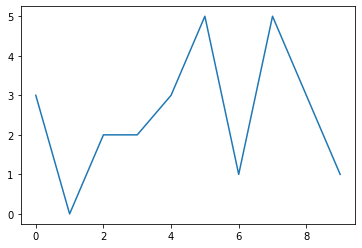

In [8]:
s = pd.Series(np.random.randint(0, 7, size=10))
s.plot()

In [2]:
pd.Categorical(["test", "train", "test", "train", "test", "train"], categories= ["test", "train"])
np.random.randint(0,100,size = [2,2])

array([[54, 87],
       [61, 93]])